# Echogram Examples

In this notebook, we utilize concatenated data from the Pacific hake survey to create echograms and tricolor echograms. These datasets have been enriched with geographical coordinates.

## Significance of Echogram Visualization

Echogram plotting is of utmost importance for various reasons:

- Fisheries scientists use echograms to scroll through a transect of echosounder data, such as those collected during the hake survey on a ship. This allows them to identify dense aggregations of fish, and this feature can be turned off when not needed.

- Oceanographers find echograms invaluable for scrolling through months' worth of echosounder data from moorings (e.g., OOI) to observe changes in zooplankton daily movements over extended periods (often 24/7).

- Oceanographers often utilize the "tricolor" echogram, which maps three frequencies to RGB colors. This enables them to distinguish between different fish species based on color variations.

- Fisheries scientists can select a specific area on the echogram display to focus on a region of interest and analyze the `Sv` (volume backscattering strength) within that area for fish analysis. Additionally, they may need to export the dataset sliced by the selected box, allowing them to save the specific `Sv` values within that region to a separate file for further analysis or sharing with colleagues.

## Import Packages and Data 

In [9]:
import panel
import xarray as xr

import echoshader

In [2]:
from urllib import request

# Calibratd data is stored in Google Drive
url = 'https://drive.google.com/uc?export=download&id=197D0MW-bHaF6mZLcQwyr4zqyEHIfwsep'

def urllib_download():
    request.urlretrieve(url, 'concatenated_MVBS.nc')

urllib_download() 

# Load sample data for testing
MVBS_ds = xr.open_mfdataset(
    paths="concatenated_MVBS.nc",
    data_vars="minimal",
    coords="minimal",
    combine="by_coords",
)

MVBS_ds

<xarray.Dataset>
Dimensions:            (channel: 4, echo_range: 150, ping_time: 875)
Coordinates:
  * channel            (channel) object 'GPT  18 kHz 009072058c8d 1-1 ES18-11...
  * echo_range         (echo_range) float64 0.0 5.0 10.0 ... 735.0 740.0 745.0
  * ping_time          (ping_time) datetime64[ns] 2017-07-24T19:30:00 ... 201...
    time1              (ping_time) datetime64[ns] dask.array<chunksize=(875,), meta=np.ndarray>
Data variables:
    Sv                 (channel, ping_time, echo_range) float64 dask.array<chunksize=(4, 875, 150), meta=np.ndarray>
    frequency_nominal  (channel) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    longitude          (ping_time) float64 dask.array<chunksize=(875,), meta=np.ndarray>
    latitude           (ping_time) float64 dask.array<chunksize=(875,), meta=np.ndarray>
Attributes:
    processing_software_name:     echopype
    processing_software_version:  0.7.1
    processing_time:              2023-05-30T17:40:45Z
    processing_function:          commongrid.compute_MVBS

## Echogram Demonstration

Users have the flexibility to personalize the default settings of echograms with the following options:

- `channel`: A list of frequency channels to display as stacks.

- `cmap`: This setting allows users to choose a colormap for the echogram plot. Users can opt for built-in colormaps, such as "jet" (explore the gallery [here](https://holoviews.org/user_guide/Colormaps.html)), or input customized colormaps using arrays, like the "EK500" example shown below.

- `vmin`: Set the minimum value for the Sv (volume backscattering strength) range.

- `vmax`: Define the maximum value for the Sv range.

In [3]:
eg = MVBS_ds.eshader.echogram(
    channel = [
        'GPT  18 kHz 009072058c8d 1-1 ES18-11',
        'GPT  38 kHz 009072058146 2-1 ES38B',
        'GPT 120 kHz 00907205a6d0 4-1 ES120-7C',
        ],
    cmap = [
        "#FFFFFF",
        "#9F9F9F", 
        "#5F5F5F", 
        "#0000FF", 
        "#00007F", 
        "#00BF00", 
        "#007F00", 
        "#FFFF00", 
        "#FF7F00", 
        "#FF00BF", 
        "#FF0000", 
        "#A6533C", 
        "#783C28",
    ], 
    vmin = -80, 
    vmax = -30,
)

panel.Row(eg)

BokehModel(combine_events=True, render_bundle={'docs_json': {'853d38ba-eceb-49c1-9790-127478f8b6f5': {'version…

There are two control widgets associated with the echograms:

- `colormap`: This widget allows you to adjust the colormap used for the echograms.

- `Sv_range_slider`: This slider widget enables you to control the Sv (volume backscattering strength) range displayed in the echograms.

In [4]:
Sv_range_slider = MVBS_ds.eshader.Sv_range_slider

colormap = MVBS_ds.eshader.colormap

echogram_panel = panel.Row(
    panel.Column(
        Sv_range_slider,
        colormap,
    ),
    eg,
)

echogram_panel

BokehModel(combine_events=True, render_bundle={'docs_json': {'00aabd26-66ce-4b84-bc03-3f6f2182e55e': {'version…

## Tricolor Echogram Demonstration

To activate tricolor mode, simply set `rgb_composite = True`.

The order of the channel list determines the RGB mapping relationship. For instance, in the example shown below, the tricolor colormap maps the 120kHz channel to the red channel, the 38kHz channel to the green channel, and the 18Hz channel to the blue channel.

In [5]:
tricolor_eg = MVBS_ds.eshader.echogram(
    channel=[
        "GPT 120 kHz 00907205a6d0 4-1 ES120-7C",
        "GPT  38 kHz 009072058146 2-1 ES38B",
        "GPT  18 kHz 009072058c8d 1-1 ES18-11",
    ],
    vmin = -80, 
    vmax = -30,
    rgb_composite = True,
)

panel.Row(tricolor_eg)

BokehModel(combine_events=True, render_bundle={'docs_json': {'db84d9fc-2792-4d33-bf75-252beff62e54': {'version…

There is only one control widget associated with tricolor echograms:

- `Sv_range_slider`: This slider widget allows you to adjust the Sv (volume backscattering strength) range displayed in the tricolor echograms.

In [6]:
Sv_range_slider = MVBS_ds.eshader.Sv_range_slider

tricolor_echogram_panel = panel.Row(
    Sv_range_slider,
    tricolor_eg,
)

tricolor_echogram_panel

BokehModel(combine_events=True, render_bundle={'docs_json': {'fcc05e96-d1ba-465d-a370-2eb06f80d8fc': {'version…

## Box Selection

Users can utilize the `Box Select` feature in the toolbar to define a specific rectangular area on the echogram display and obtain the corresponding dataset.

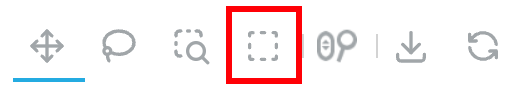

To clear the selected box and reset the box selection, simply use the `Reset Button`.

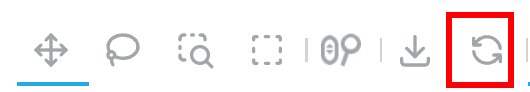

In [7]:
data_from_box_select = MVBS_ds.eshader.get_data_from_box()

## Applying Plot Customizations

Users have the option to input `Holoviews options` to tailor the visualizations according to their preferences.

For more in-depth information on using `Holoviews options`, please refer to this [link](https://holoviews.org/user_guide/Applying_Customizations.html#option-list-syntax).

In [8]:
from holoviews import opts

# image_opts = opts.Image(invert_yaxis=True)
image_opts = opts.Image(cmap='Gray')

eg = MVBS_ds.eshader.echogram(
        channel = ['GPT  38 kHz 009072058146 2-1 ES38B'],
        vmin = -80, 
        vmax = -30,
        opts = image_opts,
)

panel.Row(eg)

BokehModel(combine_events=True, render_bundle={'docs_json': {'0852ea4e-2b51-4fa6-8c44-ec1a0ede48c8': {'version…